In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [2]:
(xr,yr), (xt,yt)= keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
xr.shape, yr.shape, xt.shape, yt.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
x= xr[37]
#%%
for i in range(28):
    for j in range(28):
        z= x[i,j]
        print(f'{z:3d}', end='')
    print()

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 73253227 73 21  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 73251251251174  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0 16166228251251251122  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0 62220253251251251251 79  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0 79231253251251251251232 77  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0145253253253255253253253253255108  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0144251251251253168107169251253189 20  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 27 89236251235215164 15  612925125325

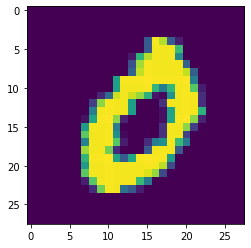

In [5]:
import matplotlib.pyplot as pl
pl.imshow(x)

In [6]:
xr1= xr.reshape(-1, 28*28) 
xt1= xt.reshape(-1, 28*28)

In [7]:
aModel= keras.Sequential([
    keras.Input(28*28),
    keras.layers.Dense(100),    
    keras.layers.Dense(10)   
    ])

aModel.compile(
    loss=     'sparse_categorical_crossentropy',
    metrics= ['accuracy']
    )

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


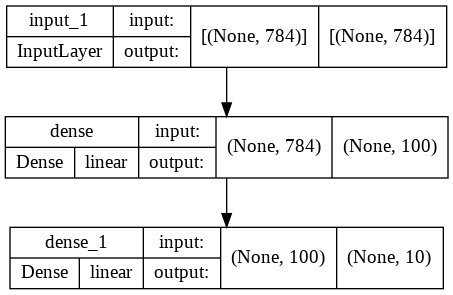

In [8]:
aModel.summary()

keras.utils.plot_model(aModel, 
    show_shapes= True, 
    show_layer_activations= True)

# 以下是更改程式碼部分

# 想想看，你能做那些改進來提升正確率 (accuracy) ？
# 1.修改模型層數(增加每層可容納unit以減少層數)
# 2.使用adam optimizer(優化器會自動調整學習率，保留學習方向的動量，提升學習效率)
# 3.增加batchs -> 200(增加一次送入GPU的數量)
# 4.增加epochs -> 20(增加訓練次數達到更好成效)
# 5.將圖片轉化為灰階(色彩通道降階，提升辨識度)

In [9]:
xr2= xr.reshape(-1, 28*28) 
xt2= xt.reshape(-1, 28*28)

In [10]:
xr2 = xr2 / 255
xt2 = xt2 / 255

In [11]:
bModel= keras.Sequential([
    keras.Input(28*28),
    keras.layers.Dense(300, activation= 'relu'), 
    keras.layers.Dense(10,  activation= 'softmax')
    ])

bModel.compile(
    optimizer = 'adam',
    loss=     'sparse_categorical_crossentropy',
    metrics= ['accuracy']
    )

bModel.fit(xr2, yr, 
           epochs= 20, 
           batch_size= 200)

bModel.evaluate(xt2, yt)

Epoch 1/20
300/300 [==============================] - 7s 5ms/step - loss: 0.3448 - accuracy: 0.9034
Epoch 2/20
300/300 [==============================] - 1s 4ms/step - loss: 0.1480 - accuracy: 0.9580
Epoch 3/20
300/300 [==============================] - 1s 4ms/step - loss: 0.1013 - accuracy: 0.9713
Epoch 4/20
300/300 [==============================] - 1s 4ms/step - loss: 0.0763 - accuracy: 0.9783
Epoch 5/20
300/300 [==============================] - 1s 4ms/step - loss: 0.0585 - accuracy: 0.9833
Epoch 6/20
300/300 [==============================] - 1s 4ms/step - loss: 0.0478 - accuracy: 0.9865
Epoch 7/20
300/300 [==============================] - 1s 5ms/step - loss: 0.0386 - accuracy: 0.9895
Epoch 8/20
300/300 [==============================] - 1s 3ms/step - loss: 0.0304 - accuracy: 0.9918
Epoch 9/20
300/300 [==============================] - 1s 2ms/step - loss: 0.0243 - accuracy: 0.9942
Epoch 10/20
300/300 [==============================] - 1s 2ms/step - loss: 0.0198 - accuracy: 0.9954

[0.06736598908901215, 0.9818999767303467]

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


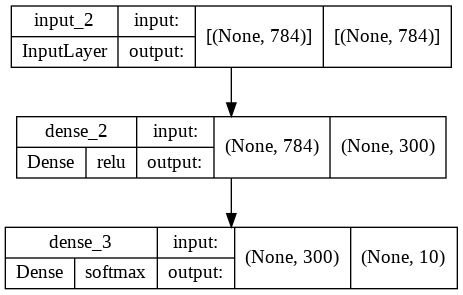

In [12]:
aModel.summary()

keras.utils.plot_model(bModel, 
    show_shapes= True, 
    show_layer_activations= True)

# 結論
# train_acc = 0.9998

# test_acc = 0.9819